<h1><center>LABORATORIO CALIFICADO 1</center></h1>
<h1><center>Análisis de datos - Netflix</center></h1>

![](https://logodownload.org/wp-content/uploads/2014/10/netflix-logo-2.png)

Resuelva las diferentes secciones del presente documento utilizando Pandas y las demás librerías científicas de Python.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
sns.set_style("darkgrid")
warnings.filterwarnings("ignore")

### Importe la informacion del archivo CSV

In [2]:
# Importe la informacion del archivo "netflix_titles.csv" a un DataFrame
df = pd.read_csv("netflix_titles.csv")

### Muestre las 7 últimas filas del DataFrame  (1 pto)

In [3]:
# Escriba aquí el código de su solución:

df.tail(7)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8800,s8801,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


### Muestre información de las columnas del DataFrame  (1 pto)

In [4]:
# Escriba aquí el código de su solución:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


### ¿Cuántos registros NaN existen por columna?  (1 pto)

In [5]:
# Escriba aquí el código de su solución:

df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

### Elimine los registros que contengan NaN en las columnas `date_added`  (1 pto)
No debe existir ningun registro con NaN en esta columna, por lo que las filas que contengan NaN en la columna "date_added" deben de descartarse.

In [6]:
# Escriba aquí el código de su solución:

df = df.dropna(subset=["date_added"])
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


### Confirme la modificación anterior, mostrando que el numero de NaN en `date_added` es 0  (0.5 ptos)

In [7]:
# Escriba aquí el código de su solución:

df.isna().sum()

show_id            0
type               0
title              0
director        2624
cast             825
country          830
date_added         0
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

### ¿Cuantos tipos de programas ofrece la plataforma Netflix y cuántos de cada tipo?  (1 pto)


In [8]:
# Escriba aquí el código de su solución:

df["type"].value_counts()

Movie      6131
TV Show    2666
Name: type, dtype: int64

### ¿Cómo están distribuidos los ratings de los programas en la plataforma? (1 pto)

In [9]:
# Escriba aquí el código de su solución:

df['rating'].value_counts()

TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

### ¿El Perú tiene alguna producción en la plataforma Netflix?  (1.5 ptos)

In [10]:
# Escriba aquí el código de su solución:

df[df["country"]=="Peru"][["title", "director", "release_year"]]

,title,director,release_year
4486,How to Get Over a Breakup,"Joanna Lombardi, Bruno Ascenzo",2018
4827,Pacificum: Return to the Ocean,"Mariana Tschudi, Héctor Gálvez",2017
5698,Asu Mare 2,Ricardo Maldonado,2015
8026,Sinister Circle,Dorian Fernández-Moris,2017


### ¿Cuál es la película más antigua en la plataforma Netflix?  (1 pto)

In [11]:
# Escriba aquí el código de su solución:

df.sort_values("release_year")[["title","release_year"]].head(1)

,title,release_year
4250,Pioneers: First Women Filmmakers*,1925


### Liste las 10 series con el mayor número de temporadas en la plataforma Netflix?  (1.5 ptos)

In [12]:
# Escriba aquí el código de su solución:
df["num_season"] = df[df["type"]=="TV Show"]["duration"].apply(lambda x: int(str(x).split()[0]))
df[df["type"]=="TV Show"].sort_values(["num_season","title"] , ascending=[False, True])[["type","title","duration", "num_season"]].head(10)

,type,title,duration,num_season
548,TV Show,Grey's Anatomy,17 Seasons,17.0
4798,TV Show,NCIS,15 Seasons,15.0
2423,TV Show,Supernatural,15 Seasons,15.0
4220,TV Show,COMEDIANS of the world,13 Seasons,13.0
1354,TV Show,Heartland,13 Seasons,13.0
5412,TV Show,Criminal Minds,12 Seasons,12.0
4964,TV Show,Trailer Park Boys,12 Seasons,12.0
6456,TV Show,Cheers,11 Seasons,11.0
6549,TV Show,Dad's Army,10 Seasons,10.0
5908,TV Show,Danger Mouse: Classic Collection,10 Seasons,10.0


### ¿Qué programas de Reality TV tiene la platforma que sean producidos en Canadá?  (1 pto)

In [13]:
# Escriba aquí el código de su solución:

df[df["listed_in"]=="Reality TV"][df["country"]=="Canada"][["title", "listed_in"]]

,title,listed_in
6969,Highway Thru Hell,Reality TV
7297,License to Drill: Louisiana,Reality TV


### ¿Tiene la plataforma Netflix alguna película protagonizada por Al Pacino?  (1.5 ptos)

In [14]:
# Escriba aquí el código de su solución:

df["protagonista"]=df["cast"].apply(lambda x: str(x).split(", ")[0])
df[df["protagonista"]=="Al Pacino"][["title", "cast"]]

,title,cast
6633,Donnie Brasco,"Al Pacino, Johnny Depp, Michael Madsen, Bruno ..."
6915,Hangman,"Al Pacino, Karl Urban, Brittany Snow, Joe Ande..."
7395,Manglehorn,"Al Pacino, Holly Hunter, Harmony Korine, Chris..."


### Muestre un gráfico de barras con los 10 paises con más producciones en la plataforma de Netflix, ordenados de forma descendente por número de producciones   (2 ptos)

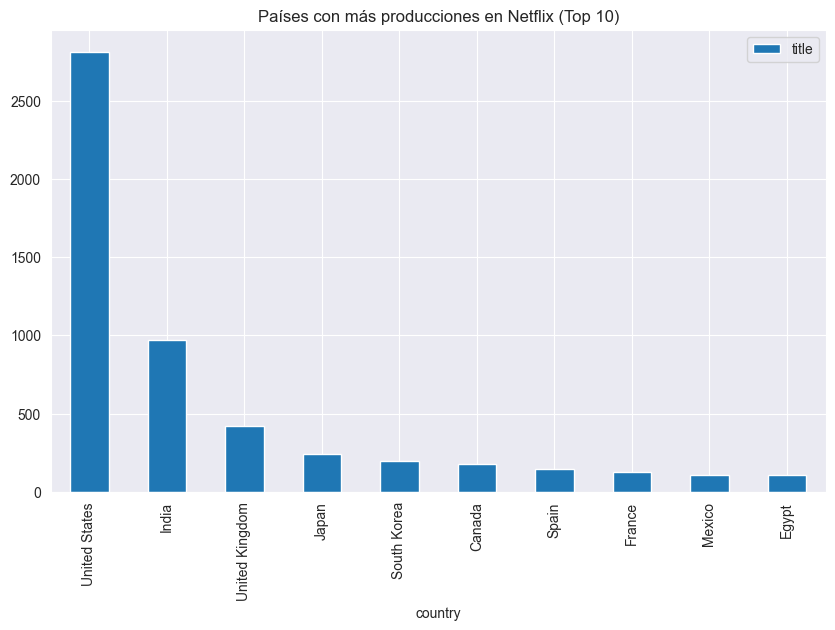

In [15]:
# Escriba aquí el código de su solución:

df_top_10 = df[["country", "title"]].groupby("country").count().sort_values("title", ascending=False).head(10)
df_top_10.plot.bar(figsize = (10,6))
plt.title("Países con más producciones en Netflix (Top 10)")
plt.show()

### Muestre un gráfico con las distribuciones por raiting de las series  (2 ptos)

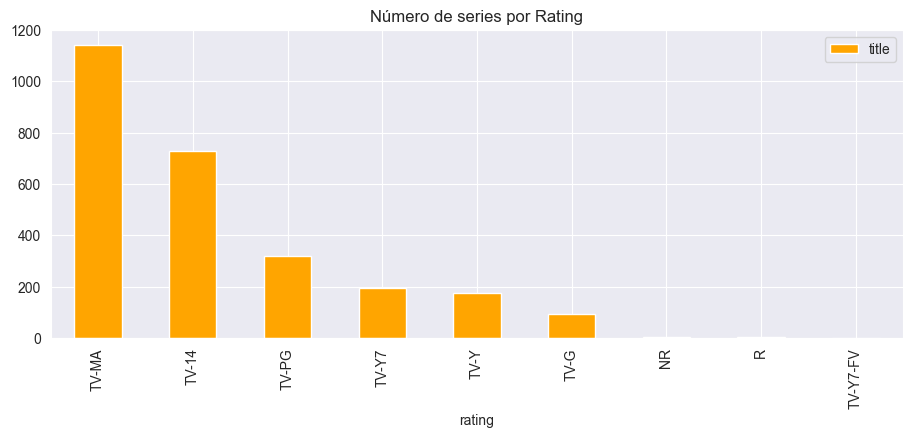

In [16]:
# Escriba aquí el código de su solución:

df_series = df[df["type"]=="TV Show"][["rating", "title"]].groupby("rating").count().sort_values("title", ascending = False)
df_series.plot.bar(figsize = (11,4), color="orange")
plt.title("Número de series por Rating")
plt.show()

### Muestre un gráfico con el número de producciones por año de lanzamiento en la plataforma, ordenados por año de forma ascendente (utilice escala logaritmica para el eje y) (3 ptos)


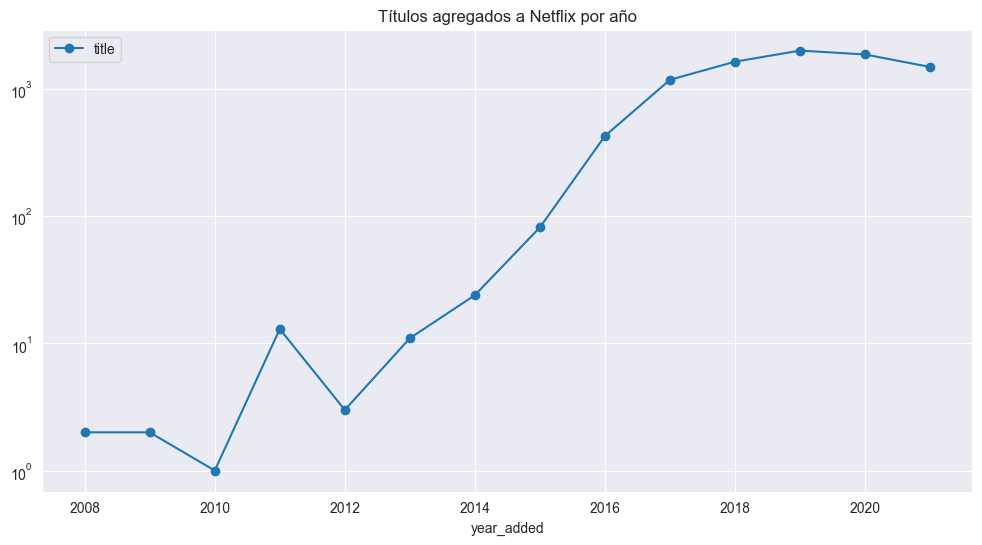

In [17]:
# Escriba aquí el código de su solución:

df["year_added"] = df["date_added"].apply(lambda fecha: str(fecha).split()[-1])
df_anios = df[["year_added", "title"]].groupby("year_added").count()
df_anios.plot(marker="o", figsize=(12,6))
plt.yscale("log")
plt.title("Títulos agregados a Netflix por año")
plt.show()